In [1]:
import numpy as np
import pandas as pd
import math
from icecream import ic
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
pd_df = pd.read_table("cost.csv",sep=",", header=None)
distance_matrix = pd.read_table("cost.csv",sep=",").to_numpy()

# Excercise 7

#### Implement simulated annealing for the travelling salesman. As proposal, permute two random stations on the route. As cooling scheme, you can use e.g. Tk = 1sqrt(√1 + k). or Tk = −log(k +1), feel free to experiment with different choices. The route must end where it started. Initialise with a random permutation of stations.

In [3]:
# Define the distance function, this function will take a route eg. [1,2,3] 
# and the distance matrix and calculate the distance of that route, including the return
# In our example, the cost is equal to the euclidean distance provided in the matrix

def distance(route, distance_matrix):
    # Add the distances between the cities of the route
    total_distance = 0
    for i in range(len(route) -1):
        total_distance += distance_matrix[route[i], route[i + 1]]
    # Add return
    total_distance += distance_matrix[route[-1], route[0]]

    return total_distance

# To make new routes, we swap two stations in the route. This function does that. 
def swap_two_stations(route):
    new_route = route[:]
    # We pick two random stations and swap them
    i, j = random.sample(range(len(route)), 2)
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

In [177]:
# We make a function to apply simulated annealing

# Define temperature
T = lambda k: 1 / math.sqrt(1 + k)

def simulated_annealing(distance_matrix, k, max_iter):
    list_of_costs = []
    list_of_routes = []
    # Initial route is randomized
    n = len(distance_matrix)
    initial_route = np.arange(n)
    np.random.shuffle(initial_route)

    # initial_route = np.random.shuffle(np.arange(n))

    # We calculate the currect cost using the distance function
    current_route = initial_route
    current_cost = distance(initial_route, distance_matrix)

    best_route = current_route
    best_cost = current_cost

    list_of_costs.append(current_cost)
    list_of_routes.append(current_route)
    list_of_steps = [0]

    for i in tqdm(range(max_iter)):

        new_route = swap_two_stations(current_route) # Swap two stations
        new_cost = distance(new_route, distance_matrix) # Calculate new cost

        # If the new cost is lower we accept
        # Otherwise we accept with a certain probability
        if new_cost < current_cost or np.random.uniform() < math.exp((current_cost - new_cost) / T(k)):
                current_route = new_route
                current_cost = new_cost

        # Possibly add and track the best cost so far
        if new_cost < list_of_costs[-1]:
            list_of_routes.append(new_route)
            list_of_costs.append(new_cost)
            list_of_steps.append(i+1)


        # Increase k to lower to temperature
        k += 0.005
    best_route = list_of_routes[-1]
    best_cost = list_of_costs[-1]

    return best_route, best_cost, list_of_costs, list_of_routes, list_of_steps

In [178]:
best_route, best_cost, list_of_costs, list_of_routes, list_of_steps = simulated_annealing(distance_matrix, 
                                            0, 
                                            10_000_000)
print(best_route)
print(best_cost)


100%|██████████| 10000000/10000000 [01:09<00:00, 142934.83it/s]

[17 12  6 10  8  9  7  4  2 18 14 11 15  3  5 13 16  1  0]
584


We can visualise the routes and plot the costs over the iterations from the function

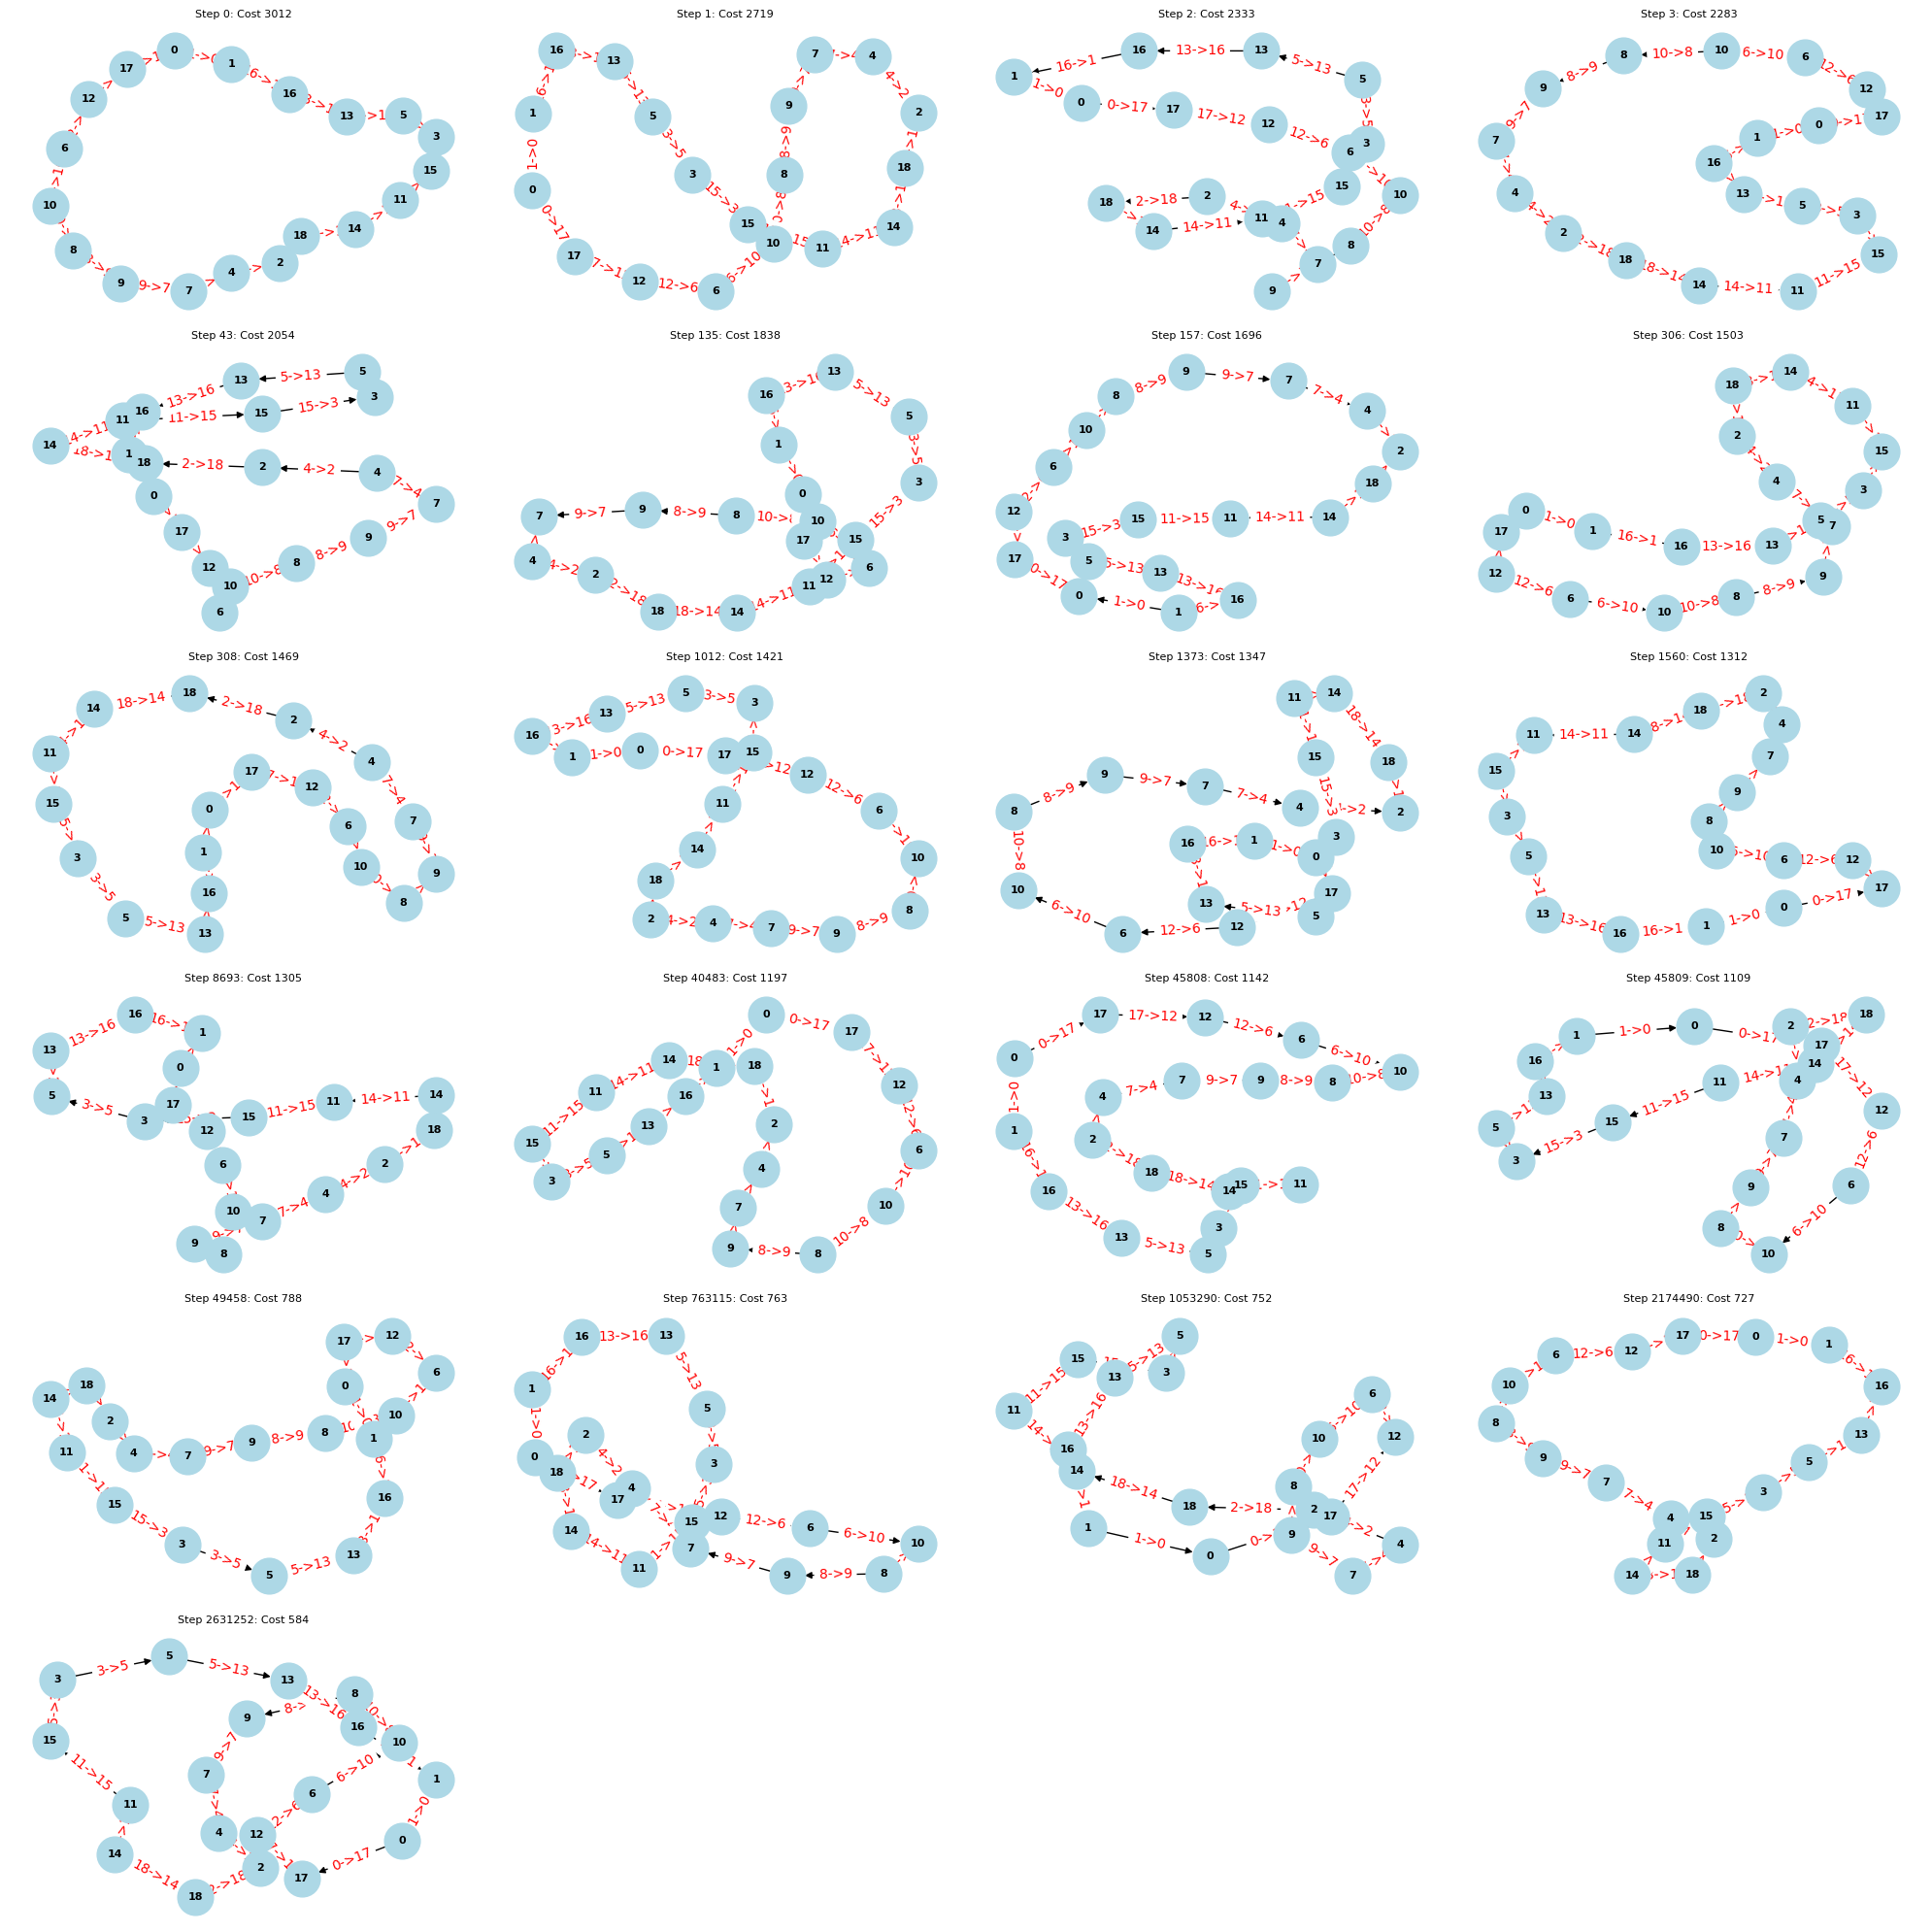

In [180]:
import networkx as nx

def plot_route(ax, route, cost, step):
    G = nx.DiGraph()

    # Add edges to the graph
    for i in range(len(route) - 1):
        G.add_edge(route[i], route[i + 1])
    G.add_edge(route[-1], route[0])  # to make it a round trip

    # Draw the graph
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=8, font_weight="bold", arrows=True, ax=ax)
    edge_labels = {(route[i], route[i + 1]): f'{route[i]}->{route[i + 1]}' for i in range(len(route) - 1)}
    edge_labels[(route[-1], route[0])] = f'{route[-1]}->{route[0]}'
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', ax=ax)

    ax.set_title(f'Step {step}: Cost {cost}', fontsize=8)

# Create subplots
fig, axs = plt.subplots(6, 4, figsize=(20, 20))

# Plot all routes
for ax, step, route, cost in zip(axs.flatten(), list_of_steps, list_of_routes, list_of_costs):
    plot_route(ax, route, cost, step)

# Hide any empty subplots
for ax in axs.flatten()[len(list_of_steps):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

We plot the best cost over the iterations of the loop 

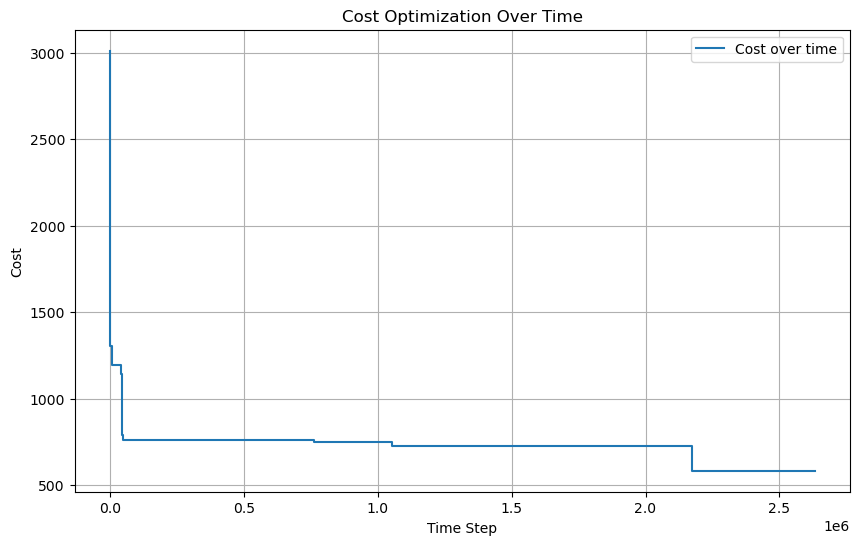

In [181]:
# Create a plot
plt.figure(figsize=(10, 6))
plt.step(list_of_steps, list_of_costs, label='Cost over time')
plt.xlabel('Time Step')
plt.ylabel('Cost')
plt.title('Cost Optimization Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()